# Selenium Basic
- selenium - 본래는 web driver를 테스트, 동작시켜보기 위한 목적 
- https://www.selenium.dev/documentation/
- https://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.common.action_chains

## 1. selenium webdriver 사용하기

In [4]:
from selenium import webdriver
driver = webdriver.Chrome(executable_path='../driver/chromedriver.exe')
driver.get("https://www.naver.com/") # 열기

In [2]:
driver.quit() # 웬만하면 꺼준다.

In [5]:
# 화면 최대 크기 설정
driver.maximize_window()

In [6]:
# 화면 최소 크기 설정
driver.minimize_window()

In [7]:
# 화면 크기 설정
driver.set_window_size(900, 1000)

In [8]:
# 새로 고침
driver.refresh()

In [9]:
# 뒤로 가기
driver.back()

In [10]:
# 앞으로 가기
driver.forward()

In [11]:
#  클릭
from selenium.webdriver.common.by import By

first_content = driver.find_element(By.CSS_SELECTOR, "#feed > div.feed_area > div > ul > li:nth-child(1)")
first_content.click()

In [12]:
# 새로운 탭 생성
driver.execute_script('window.open("")')

In [13]:
# 탭 이동
driver.switch_to.window(driver.window_handles[0])

In [14]:
len(driver.window_handles)

3

In [15]:
# 탭 닫기
driver.close()

In [16]:
driver.quit()

## 2. 화면 스크롤

In [20]:
from selenium import webdriver
driver = webdriver.Chrome(executable_path='../driver/chromedriver.exe')
driver.get("https://www.naver.com/")

In [21]:
driver.execute_script('return document.body.scrollHeight') # html document를 의미

2805

In [22]:
# 화면 스크롤 하단 이동
driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')

In [23]:
# 현재 보이는 화면 스크린샷 저장
driver.save_screenshot('./last_height.png')

True

In [24]:
# 화면 스크롤 상단 이동
driver.execute_script('window.scrollTo(0, 0);')

In [25]:
# 특정 태그 지점까지 스크롤 이동
from selenium.webdriver import ActionChains

some_tag = driver.find_element(By.CSS_SELECTOR, '#feed > div.ContentHeaderView-module__content_header___nSgPg')
action = ActionChains(driver)
action.move_to_element(some_tag).perform()

In [26]:
driver.quit()

## 3. 검색어 입력
- CSS_SELECTOR

In [27]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [28]:
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get('https://www.naver.com')

In [29]:
keyword = driver.find_element(By.CSS_SELECTOR,'#query')
keyword.send_keys('파이썬')

In [30]:
search_btn = driver.find_element(By.CSS_SELECTOR, '#sform > fieldset > button')
search_btn.click()

In [31]:
keyword = driver.find_element(By.CSS_SELECTOR, '#nx_query')
keyword.clear()
keyword.send_keys('딥러닝')

In [32]:
search_btn = driver.find_element(By.CSS_SELECTOR, '#nx_search_form > fieldset > button')
search_btn.click()

- XPATH

```
'//' : 최상위 루트
'*' : 자손 태그
'/' : 자식 태그
'div[1]' : div 태그들 중에서 1번째 태그

//*[@id="main_pack"]/section[1]/div/div[2]/panel-list/div/ul/li[1]/div/div/a
```

In [35]:
driver.find_element(By.XPATH, '//*[@id="query"]').send_keys('xpath')|

SyntaxError: invalid syntax (880170419.py, line 1)

In [36]:
driver.find_element(By.XPATH, '//*[@id="sform"]/fieldset/button').click() # 따옴표 겹치지 않게 유의.

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="sform"]/fieldset/button"}
  (Session info: chrome=114.0.5735.199)


In [37]:
driver.quit()

In [38]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [39]:
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get('https://pinkwink.kr/')

In [40]:
driver.set_window_size(900, 1000)

In [41]:
# 1. 돋보기 버튼을 선택 / 검색창 선택
# 태그를 찾았는데, 실행시 element와 상호작용이 안된다고함 - 동적페이지이기 때문
from selenium.webdriver import ActionChains

#search_tag = driver.find_element(By.CSS_SELECTOR, '.search')
action = ActionChains(driver)
action.click(driver.find_element(By.CSS_SELECTOR, '.search'))
action.perform()

In [42]:
# 2. 검색어를 입력
driver.find_element(By.XPATH, '//*[@id="header"]/div[2]/input').send_keys('딥러닝')

In [43]:
# 3. 검색 버튼 클릭
driver.find_element(By.XPATH, '//*[@id="header"]/div[2]/button').click()

In [44]:
# 4. 뒤로가기
driver.back()

## 4. selenium + beautifulsoup

In [45]:
# 현재 화면의 html 코드 가져오기
driver.page_source

'<html lang="ko"><head><script src="https://partner.googleadservices.com/gampad/cookie.js?domain=pinkwink.kr&amp;callback=_gfp_s_&amp;client=ca-pub-2982459700139266&amp;cookie=ID%3D5adb8197e3329288-22ba0e6150e2004d%3AT%3D1689053332%3ART%3D1689053332%3AS%3DALNI_MaLg0Y6Qf4qgyDFm6o61ZaqDO65RQ&amp;gpic=UID%3D00000c1fac2d7a68%3AT%3D1689053332%3ART%3D1689053332%3AS%3DALNI_Mbb3tVVzLHCm5kg4Gp1ZoOY91PxVA"></script><script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202307050101/show_ads_impl_fy2021.js?bust=31075873" id="google_shimpl"></script><script src="https://t1.kakaocdn.net/malibu_prod/wpm.js" async=""></script>\n                <script type="text/javascript">if (!window.T) { window.T = {} }\nwindow.T.config = {"TOP_SSL_URL":"https://www.tistory.com","PREVIEW":false,"ROLE":"guest","PREV_PAGE":"","NEXT_PAGE":"","BLOG":{"id":371175,"name":"pinkwink","title":"PinkWink","isDormancy":false},"NEED_COMMENT_LOGIN":false,"COMMENT_LOGIN_CONFIRM_MESSAGE":"","LOGIN_URL":"htt

In [46]:
from bs4 import BeautifulSoup

req = driver.page_source
soup = BeautifulSoup(req, "html.parser")

In [47]:
soup.select('.post-item')

[]

In [48]:
contents = soup.select('.post-item')
len(contents)

0

In [49]:
contents[2]

IndexError: list index out of range

## 2. 셀프 주유소가 정말 저렴하나요? - 데이터 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

## 3. 셀레니움으로 접근

In [50]:
from selenium import webdriver

In [51]:
#페이지 접근
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)

```
import time

def main_get():
    #페이지 접근
    url = "https://www.opinet.co.kr/searRgSelect.do"
    driver = webdriver.Chrome("../driver/chromedriver.exe")
    driver.get(url)
    time.sleep(3) # 3초 간격 주기

    # 팝업창 화면 전환 후 닫아주기
    driver.switch_to_window(driver.window_handlesd[-1])
    driver.close()
    time.sleep(3)

    #메인창으로 다시 전환 후 접근 URL다시 요청
    driver.switch_to_window(driver.window_handlesd[-1])
    driver.get(url)
```

In [53]:
#지역 : 시/도

sido_list_raw = driver.find_element(By.ID, 'SIDO_NM0')
sido_list_raw.text

'            시/도\n            \n             \n              서울\n             \n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n             \n              경기\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              전북\n             \n            \n             \n             \n              

In [65]:
sido_list = sido_list_raw.find_elements(By.TAG_NAME, 'option')
len(sido_list), sido_list[16].text

(18, '제주')

In [63]:
sido_list[1].get_attribute("value")

'서울특별시'

In [72]:
# 1
sido_names = []

for opt in sido_list:
    sido_names.append(opt.get_attribute("value"))
    
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도',
 '강원특별자치도']

In [71]:
# 2. list comprehension 문법
sido_names = [opt.get_attribute("value") for opt in sido_list] #위에 코드를 한줄로..
sido_names[:5]

['', '서울특별시', '부산광역시', '대구광역시', '인천광역시']

In [78]:
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도',
 '강원특별자치도']

In [79]:
sido_names[0]

'서울특별시'

In [80]:
# 지역(시/도)에 값넣기
sido_list_raw.send_keys(sido_names[0])

In [110]:
gu_list_raw = driver.find_element(By.ID, 'SIGUNGU_NM0') # 부모태그
gu_list = gu_list_raw.find_elements(By.TAG_NAME, 'option') # 자식태그 element's'

gu_names = [opt.get_attribute("value") for opt in gu_list] # 'option' 태그로부터 'value' 속성을
gu_names = gu_names[1:]
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [111]:
#driver.find_element(By.ID, 'SIGUNGU_NM0').send_keys(gu_names[4])
gu_list_raw.send_keys(gu_names[11])

In [102]:
# 엑셀 저장
element_get_excel = driver.find_element(By.ID, 'glopopd_excel') # 변수에 안담아도 됨.
#element_get_excel.click()

In [117]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element(By.ID, 'SIGUNGU_NM0')
    element.send_keys(gu) # 여기가 이해가 잘안감. 변수로 "gu"가 왜들어가지?
    time.sleep(1.5)
    
    element_get_excel = driver.find_element(By.ID, 'glopopd_excel').click()
    time.sleep(1.5)

C:\Users\fins6\AppData\Local\Temp\ipykernel_24560\3325532143.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [118]:
driver.close()

## 4. 데이터 정리하기

In [119]:
import pandas as pd
from glob import glob

In [120]:
# !pip install glob

In [121]:
# 파일 목록 한 번애 가져오기
glob("../data/지역_*.xls")


['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [122]:
# 파일명 저장
stations_files = glob("../data/지역_*.xls")
stations_files[:5]

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls']

In [125]:
# 하나만 읽어보기
tmp = pd.read_excel(stations_files[0], header=2) # header - 두번째 이후부터(엑셀파일확인)
tmp.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
12,서울특별시,천호현대주유소,서울 강동구 천중로 67 (천호동),현대오일뱅크,02-484-9323,N,-,1799,1697,-
13,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1898,1798,1700


In [126]:
tmp_raw = []
for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

In [127]:
tmp_raw

[       지역                    상호                            주소      상표  \
 0   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  현대오일뱅크   
 1   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
 2   서울특별시                 명일주유소          서울 강동구 고덕로 168 (명일동)   SK에너지   
 3   서울특별시        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)   GS칼텍스   
 4   서울특별시          대성석유(주)길동주유소              서울 강동구 천호대로 1168   GS칼텍스   
 5   서울특별시           (주)소모 신월주유소        서울 강동구 양재대로 1323 (성내동)   GS칼텍스   
 6   서울특별시               방아다리주유소          서울 강동구 동남로 811 (명일동)   SK에너지   
 7   서울특별시       (주)퍼스트오일 코알라주유소     서울특별시 강동구  올림픽로 556 (성내동)   S-OIL   
 8   서울특별시           (주)소모 성내주유소         서울 강동구 올림픽로 578 (성내동)   GS칼텍스   
 9   서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)   GS칼텍스   
 10  서울특별시              sk해뜨는주유소         서울 강동구  상일로 132 (강일동)   SK에너지   
 11  서울특별시      주)지유에너지직영 오렌지주유소          서울 강동구 성안로 102 (성내동)   SK에너지   
 12  서울특별시               천호현대주유소      

In [132]:
# 형식이 동일하고 연달아 붙일 때 concat
station_raw = pd.concat(tmp_raw)
station_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1543,1393,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1584,1465,-
2,서울특별시,명일주유소,서울 강동구 고덕로 168 (명일동),SK에너지,02-3428-1739,Y,1825,1595,1495,-
3,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,Y,1795,1595,1475,1585
4,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1855,1596,1478,1600
...,...,...,...,...,...,...,...,...,...,...
29,서울특별시,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,현대오일뱅크,02-543-1154,N,2397,2188,1998,-
30,서울특별시,갤러리아주유소,서울 강남구 압구정로 426,SK에너지,02-540-4965,N,2459,2262,2145,-
31,서울특별시,SK논현주유소,서울 강남구 논현로 747 (논현동),SK에너지,02-511-0955,N,2595,2355,2180,1835
32,서울특별시,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,현대오일뱅크,02-518-5631,N,2598,2398,2197,-


In [133]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 33
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      443 non-null    object
 1   상호      443 non-null    object
 2   주소      443 non-null    object
 3   상표      443 non-null    object
 4   전화번호    443 non-null    object
 5   셀프여부    443 non-null    object
 6   고급휘발유   443 non-null    object
 7   휘발유     443 non-null    object
 8   경유      443 non-null    object
 9   실내등유    443 non-null    object
dtypes: object(10)
memory usage: 38.1+ KB


In [134]:
station_raw.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [136]:
stations = pd.DataFrame({
    "상호" : station_raw["상호"],
    "주소" : station_raw["주소"],
    "가격" : station_raw["휘발유"],
    "셀프" : station_raw["셀프여부"],
    "상표" : station_raw["상표"],
})
stations.tail()

,상호,주소,가격,셀프,상표
29,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2188,N,현대오일뱅크
30,갤러리아주유소,서울 강남구 압구정로 426,2262,N,SK에너지
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2355,N,SK에너지
32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398,N,현대오일뱅크
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스


In [138]:
for eachAddress in stations["주소"]:
    print(eachAddress.split()[1])

강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
용산구
용산구
용산구
용산구
용산구
용산구
용산구
용산구


In [139]:
stations["구"] = [eachAddress.split()[1] for eachAddress in stations["주소"]]
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1543,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584,N,현대오일뱅크,강동구
2,명일주유소,서울 강동구 고덕로 168 (명일동),1595,Y,SK에너지,강동구
3,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1595,Y,GS칼텍스,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1596,N,GS칼텍스,강동구
...,...,...,...,...,...,...
29,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2188,N,현대오일뱅크,강남구
30,갤러리아주유소,서울 강남구 압구정로 426,2262,N,SK에너지,강남구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2355,N,SK에너지,강남구
32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398,N,현대오일뱅크,강남구


In [140]:
stations["구"].unique(), len(stations["구"].unique())

(array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
        '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object),
 25)

In [ ]:
# 강의에서 나온 처리해주어야 할 데이터
# stations[stations["구"] == "서울특별시"]
# stations.loc[staions["구"] == "서울특별시", "구"] = "성동구"
# stations[stations["구"] == "특별시"]
# stations.loc[staions["구"] == "특별시", "구"] = "도봉구"

In [141]:
# 가격 데이터형 변환 object => float
stations["가격"] = stations["가격"].astype("float")

ValueError: could not convert string to float: '-'

In [142]:
# 가격 정보 없는 주유소
stations[stations["가격"] == "-"]

,상호,주소,가격,셀프,상표,구
22,신동방주유소,서울 성북구 월계로 84 (장위동),-,Y,S-OIL,성북구
26,영등포현대셀프주유소,서울 영등포구 경인로 822 (영등포동),-,Y,현대오일뱅크,영등포구


In [143]:
# 가격 정보가 있는 주유소만 사용
stations = stations[stations["가격"] != "-"]
stations.tail()

,상호,주소,가격,셀프,상표,구
29,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2188,N,현대오일뱅크,강남구
30,갤러리아주유소,서울 강남구 압구정로 426,2262,N,SK에너지,강남구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2355,N,SK에너지,강남구
32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398,N,현대오일뱅크,강남구
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스,강남구


In [144]:
stations["가격"] = stations["가격"].astype("float")

C:\Users\fins6\AppData\Local\Temp\ipykernel_24560\693866580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations["가격"] = stations["가격"].astype("float")


In [152]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   level_0  441 non-null    int64  
 1   index    441 non-null    int64  
 2   상호       441 non-null    object 
 3   주소       441 non-null    object 
 4   가격       441 non-null    float64
 5   셀프       441 non-null    object 
 6   상표       441 non-null    object 
 7   구        441 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.7+ KB


In [153]:
stations

,level_0,index,상호,주소,가격,셀프,상표,구
0,0,0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1543.0,Y,현대오일뱅크,강동구
1,1,1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584.0,N,현대오일뱅크,강동구
2,2,2,명일주유소,서울 강동구 고덕로 168 (명일동),1595.0,Y,SK에너지,강동구
3,3,3,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1595.0,Y,GS칼텍스,강동구
4,4,4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1596.0,N,GS칼텍스,강동구
...,...,...,...,...,...,...,...,...
436,436,29,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2188.0,N,현대오일뱅크,강남구
437,437,30,갤러리아주유소,서울 강남구 압구정로 426,2262.0,N,SK에너지,강남구
438,438,31,SK논현주유소,서울 강남구 논현로 747 (논현동),2355.0,N,SK에너지,강남구
439,439,32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구


In [154]:
# concat으로 여러데이터들 인덱스를 재정렬
stations.reset_index(inplace=True)
stations

ValueError: cannot insert level_0, already exists

In [155]:
stations.head()

,level_0,index,상호,주소,가격,셀프,상표,구
0,0,0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1543.0,Y,현대오일뱅크,강동구
1,1,1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584.0,N,현대오일뱅크,강동구
2,2,2,명일주유소,서울 강동구 고덕로 168 (명일동),1595.0,Y,SK에너지,강동구
3,3,3,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1595.0,Y,GS칼텍스,강동구
4,4,4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1596.0,N,GS칼텍스,강동구


In [158]:
del stations["index"]
del stations["level_0"]
stations.head()

KeyError: 'index'

In [160]:
stations.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1543.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584.0,N,현대오일뱅크,강동구
2,명일주유소,서울 강동구 고덕로 168 (명일동),1595.0,Y,SK에너지,강동구
3,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1595.0,Y,GS칼텍스,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1596.0,N,GS칼텍스,강동구


## 5. 주유 가격 정보 시각화

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")
# %matplotlib inline

path = "C:/Windows/Fonts/MalgunGothic.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system == "Windows":
    font_name = font_manager.Fontproperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system")

Unknown system


<Axes: title={'center': '가격'}, xlabel='셀프'>

C:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
C:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
C:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49472 (\N{HANGUL SYLLABLE SEL}) missing from current font.
  func(*args, **kwargs)
C:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  func(*args, **kwargs)
C:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fins6\anaconda3\envs\ds_study\lib\site

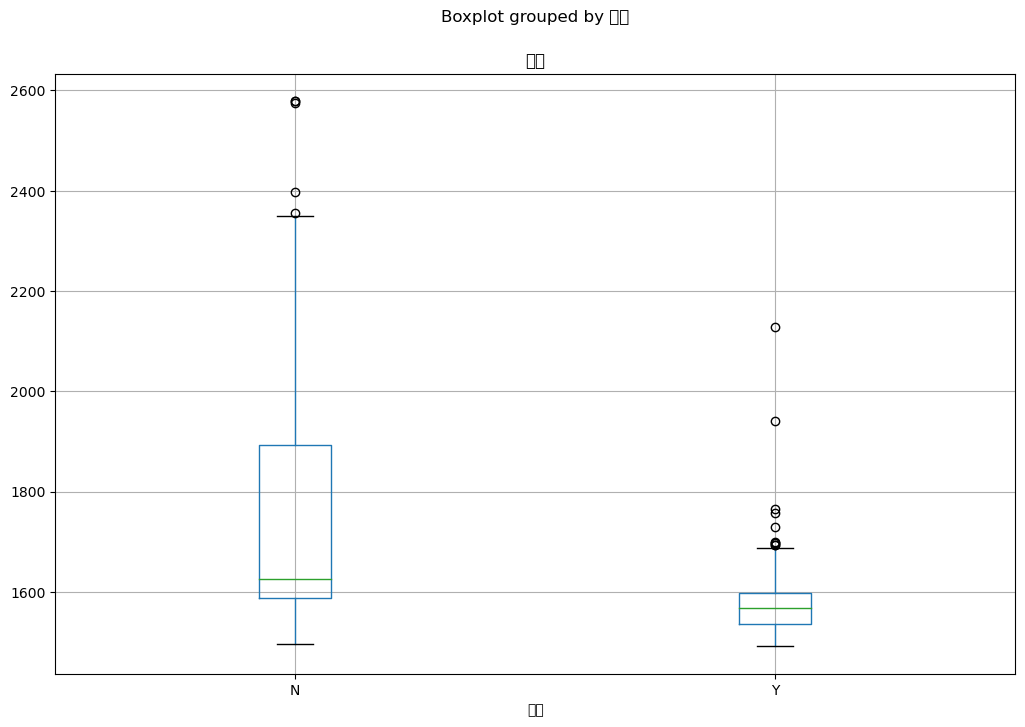

In [163]:
# boxplot(feat. pandas)

stations.boxplot(column="가격", by="셀프", figsize=(12, 8))

C:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49472 (\N{HANGUL SYLLABLE SEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


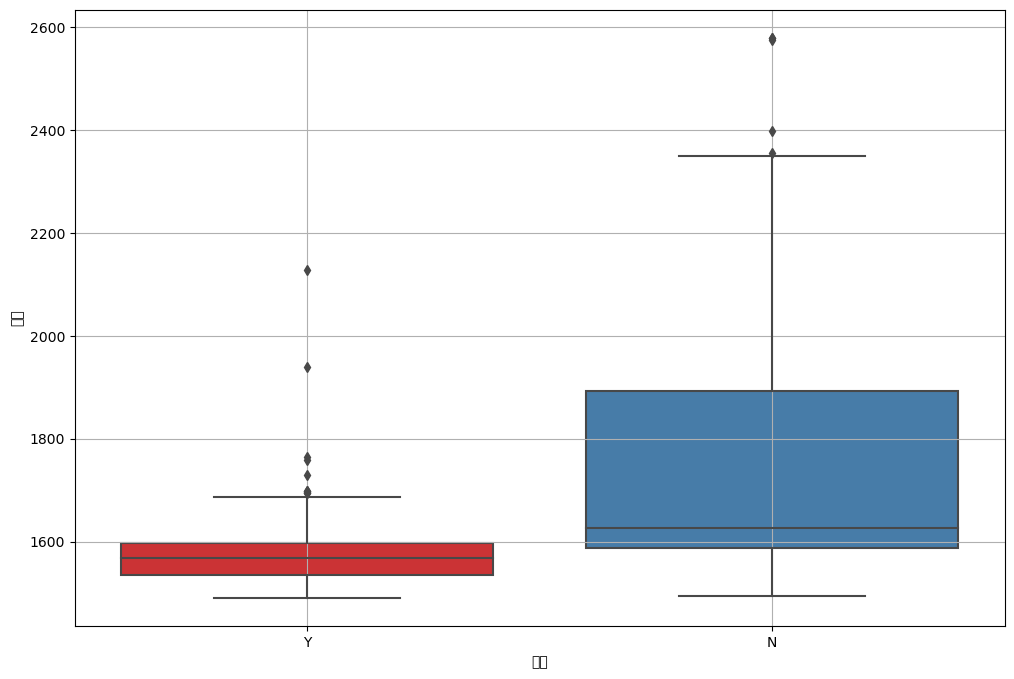

In [167]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12,8))
sns.boxplot(x="셀프", y="가격", data=stations, palette="Set1")
plt.grid(True)
plt.show()


C:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48197 (\N{HANGUL SYLLABLE BAENG}) missing from current fo

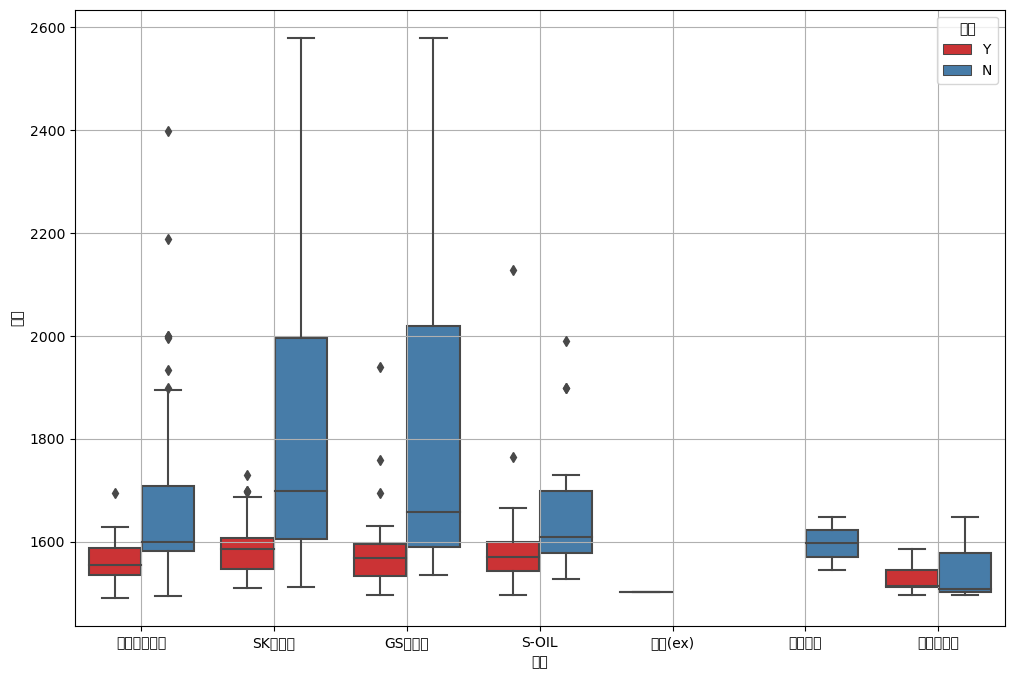

In [169]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격",hue="셀프", data=stations, palette="Set1")
plt.grid(True)
plt.show()

In [170]:
# 지도 시각화
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [171]:
# 가장 비싼 주유소 10개
stations.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
271,서남주유소,서울 중구 통일로 30,2579.0,N,SK에너지,중구
440,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구
236,서계주유소,서울 용산구 청파로 367 (청파동),2575.0,N,GS칼텍스,용산구
439,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구
438,SK논현주유소,서울 강남구 논현로 747 (논현동),2355.0,N,SK에너지,강남구
270,필동주유소,서울 중구 퇴계로 196 (필동2가),2349.0,N,GS칼텍스,중구
269,약수주유소,서울 중구 다산로 173,2266.0,N,GS칼텍스,중구
437,갤러리아주유소,서울 강남구 압구정로 426,2262.0,N,SK에너지,강남구
261,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2250.0,N,GS칼텍스,종로구
260,경복궁주유소,서울 종로구 율곡로 6 (중학동),2240.0,N,GS칼텍스,종로구


In [172]:
# 가장 싼 주유소 10개
stations.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
391,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),1491.0,Y,현대오일뱅크,도봉구
237,(주)디오티디 은평유니콘주유소,서울 은평구 통일로 1151 (진관동),1495.0,N,현대오일뱅크,은평구
287,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1497.0,Y,현대오일뱅크,강서구
286,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1497.0,N,알뜰주유소,강서구
285,화곡역주유소,서울 강서구 강서로 154 (화곡동),1497.0,Y,알뜰주유소,강서구
163,현대주유소,서울 양천구 남부순환로 372 (신월동),1497.0,Y,S-OIL,양천구
164,플라트(주)서호주유소,서울 양천구 남부순환로 317,1497.0,Y,GS칼텍스,양천구
67,만남의광장주유소,서울 서초구 양재대로12길 73-71,1502.0,Y,알뜰(ex),서초구
113,원천주유소,서울 성북구 돌곶이로 142 (장위동),1507.0,N,알뜰주유소,성북구
214,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1509.0,Y,현대오일뱅크,강북구


In [175]:
import numpy as np
gu_data = pd.pivot_table(data=stations, index="구", values="가격", aggfunc=np.mean)
gu_data.head(10)

,가격
구,
강남구,1840.705882
강동구,1648.285714
강북구,1535.583333
강서구,1591.939394
관악구,1619.928571
광진구,1581.461538
구로구,1627.600000
금천구,1592.454545
노원구,1585.400000


In [182]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=15, tiles="Stamen Toner")
my_map.choropleth(
    geo_data = geo_str,
    data = gu_data,
    columns = [gu_data.index, "가격"],
    key_on = "feature.id",
    fill_color = "PuRd"
)
my_map